## importing lib

In [56]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns


## Training Image 

In [57]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


## Validation Image

In [58]:

validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


## Building Model

In [59]:
cnn = tf.keras.models.Sequential()

In [60]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [61]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [62]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [63]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [64]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [65]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [66]:
cnn.add(tf.keras.layers.Flatten())

In [67]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [68]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [69]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

## Compiling

In [70]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [71]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_21 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                 

In [72]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)


Epoch 1/10
2197/2197 [==============================] - 183s 83ms/step - loss: 1.3412 - accuracy: 0.6034 - val_loss: 0.6163 - val_accuracy: 0.8085
Epoch 2/10
2197/2197 [==============================] - 189s 86ms/step - loss: 0.4313 - accuracy: 0.8628 - val_loss: 0.2857 - val_accuracy: 0.9062
Epoch 3/10
2197/2197 [==============================] - 188s 85ms/step - loss: 0.2602 - accuracy: 0.9168 - val_loss: 0.2149 - val_accuracy: 0.9305
Epoch 4/10
2197/2197 [==============================] - 189s 86ms/step - loss: 0.1811 - accuracy: 0.9417 - val_loss: 0.1855 - val_accuracy: 0.9405
Epoch 5/10
2197/2197 [==============================] - 217s 99ms/step - loss: 0.1300 - accuracy: 0.9576 - val_loss: 0.1637 - val_accuracy: 0.9472
Epoch 6/10
2197/2197 [==============================] - 194s 88ms/step - loss: 0.1035 - accuracy: 0.9665 - val_loss: 0.1943 - val_accuracy: 0.9435
Epoch 7/10
2197/2197 [==============================] - 195s 89ms/step - loss: 0.0805 - accuracy: 0.9734 - val_loss: 0

## Evaluating Model

In [73]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 61s 27ms/step - loss: 0.0555 - accuracy: 0.9814
Training accuracy: 0.9813926815986633


In [74]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 15s 26ms/step - loss: 0.1590 - accuracy: 0.9532
Validation accuracy: 0.9532210230827332


## Save Model

In [75]:
cnn.save('trained_plant_disease_model.keras')

In [76]:
training_history.history #Return Dictionary of history

{'loss': [1.3411527872085571,
  0.4312538504600525,
  0.26019152998924255,
  0.18114206194877625,
  0.13004207611083984,
  0.10348348319530487,
  0.08046551793813705,
  0.07182709127664566,
  0.06157402694225311,
  0.051377613097429276],
 'accuracy': [0.6033715009689331,
  0.8627783060073853,
  0.9167508482933044,
  0.9417170286178589,
  0.9576357007026672,
  0.9664698839187622,
  0.9734405279159546,
  0.977509081363678,
  0.9799843430519104,
  0.9833558797836304],
 'val_loss': [0.6162824034690857,
  0.28571054339408875,
  0.21486081182956696,
  0.18553631007671356,
  0.16368387639522552,
  0.19430890679359436,
  0.18146736919879913,
  0.11568804085254669,
  0.11614847183227539,
  0.1590384989976883],
 'val_accuracy': [0.8085021376609802,
  0.9062144160270691,
  0.9305144548416138,
  0.9404734969139099,
  0.9472455978393555,
  0.9435465335845947,
  0.9434327483177185,
  0.965114951133728,
  0.9653425812721252,
  0.9532210230827332]}

In [77]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [78]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy

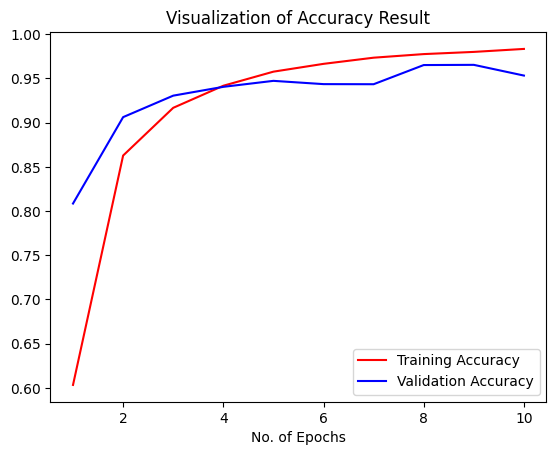

In [79]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Model Evaluation

In [80]:
class_name = validation_set.class_names

In [81]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [82]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 62s 3ms/step


In [83]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [84]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [85]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [86]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [87]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.97      0.96       504
                                 Apple___Black_rot       0.95      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.91      0.99      0.95       440
                                   Apple___healthy       0.98      0.88      0.93       502
                               Blueberry___healthy       0.97      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.82      0.89       410
                       Corn_(maize)___Common_rust_       0.98      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.98      0.

## Confusion Matrix 

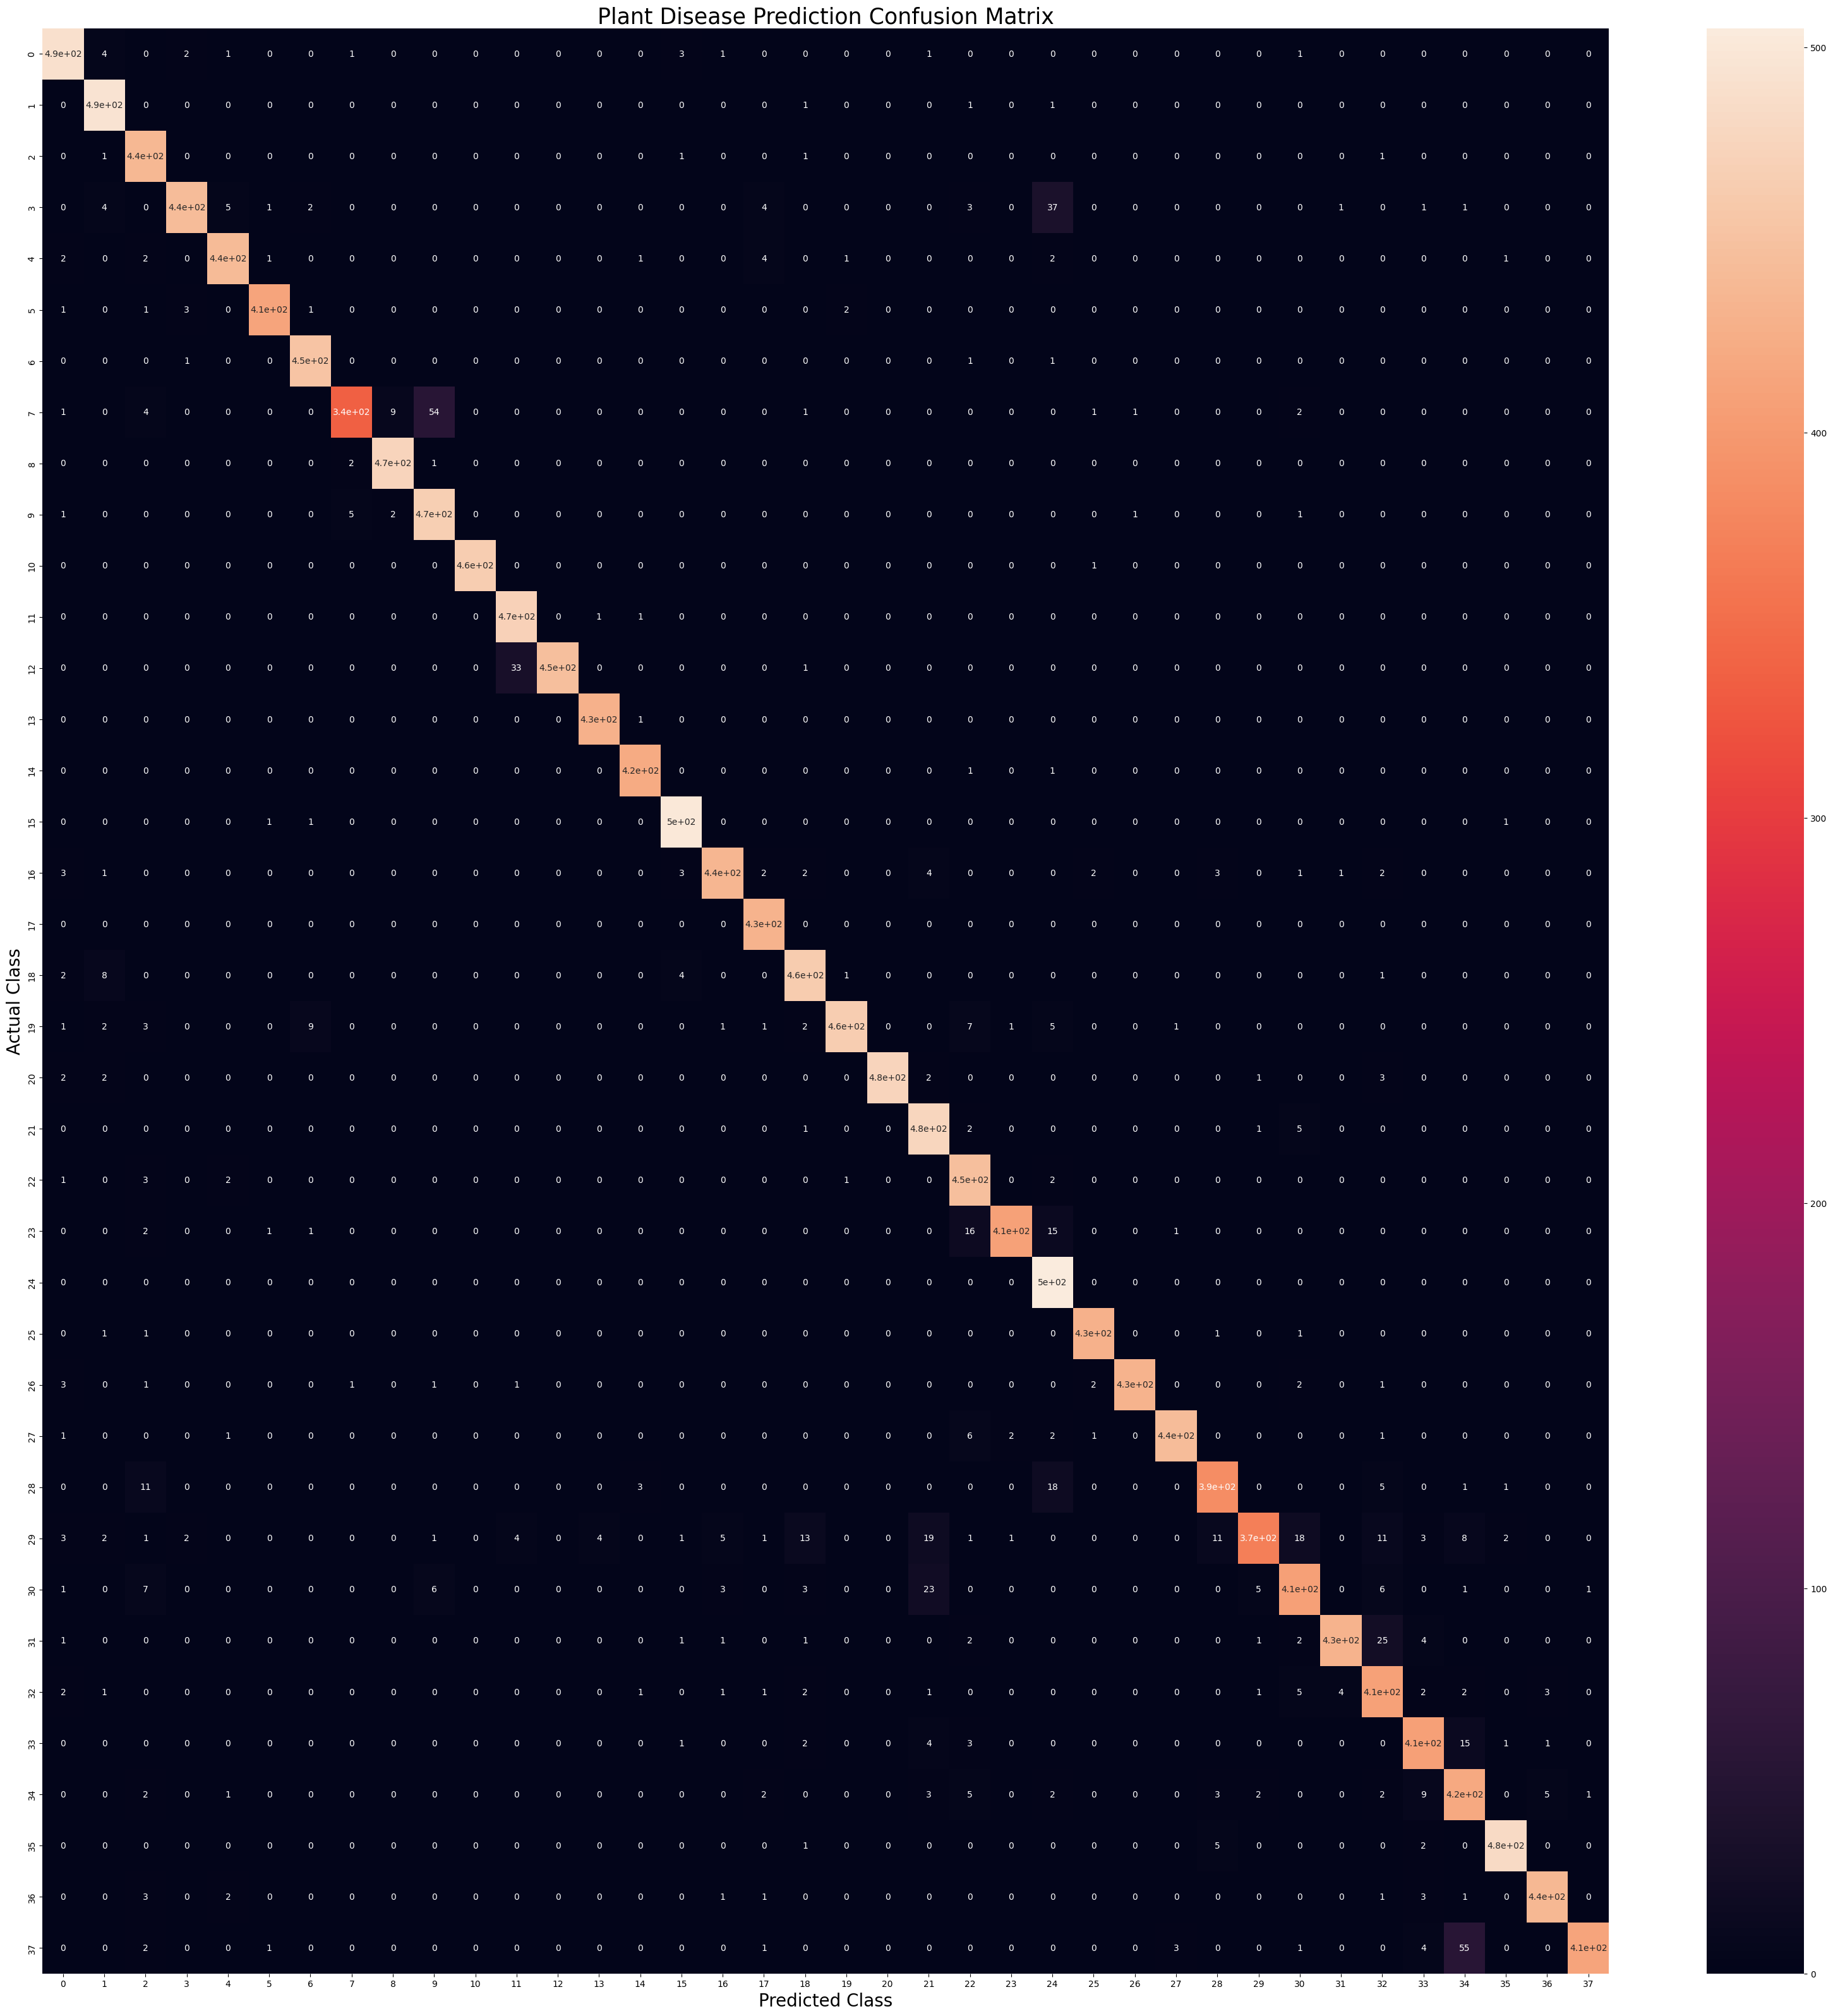

In [88]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()